In [241]:
import pandas as pd
import numpy
from sklearn.ensemble import RandomForestClassifier as rfc

np.random.seed(1234)

#read in dataset
df = pd.read_csv("data.csv")
df = df.drop(["id","Unnamed: 32"],axis=1)
df = df.replace({'diagnosis': "M"}, 1)
df = df.replace({'diagnosis': "B"}, 0)
labels = df["diagnosis"]
df = df.drop("diagnosis",axis=1)


#values formatted
dfTrn, dfDev, dfTes = numpy.split(df, [int(.15*len(df)), int(.7*len(df))])
DTrn, DDev, DTes = numpy.split(labels, [int(.15*len(labels)), int(.7*len(labels))])

#run model and test
model = rfc()
model = model.fit(dfTrn.values,DTrn)
model_score = model.score(dfDev,DDev)
print("Accuracy(%):",model_score*100)

#pretty accurate

Accuracy(%): 90.7348242812


In [3]:
import pandas as pd
import numpy
import pandas_montecarlo
from scipy.stats import shapiro, kruskal, f_oneway
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression as lgr


## RandomForest Classifier with monte carlo simulated training set
numpy.random.seed(1234)

#df = pd.read_csv("mc_test_data.csv")
df = pd.read_csv("rndf_filt_data.csv")
#print(df.head())
#df = df.drop(["id","Unnamed: 32"],axis=1)
df = df.drop(["Unnamed: 0"],axis=1)
df = df.replace({'diagnosis': "M"}, 1)
df = df.replace({'diagnosis': "B"}, 0)

#split dataset for mc seed and testing

#df_mc, df = numpy.split(df, [int(.7*len(df))])

#split dataset by class
df_1 = pd.read_csv("mc_data_M.csv").drop(["Unnamed: 0"],axis=1)
df_0 = pd.read_csv("mc_data_B.csv").drop(["Unnamed: 0"],axis=1)
#df_1 = df_mc.loc[df_mc.diagnosis==1]
#df_0 = df_mc.loc[df_mc.diagnosis==0]
#df_1 = df_1.drop(["diagnosis"],axis=1)
#df_0 = df_0.drop(["diagnosis"],axis=1)

#simulate class 0 data
mc_sim_df_0 = pd.DataFrame()
mc_sim_df_0['diagnosis']= ['0'] * len(df_0.index)
for col in df_0.columns:
    col_sim = df_0[col].montecarlo(sims = 2, bust = 0, goal = 0).data
    col_sim = col_sim.drop(["original"],axis = 1)
    for col2 in col_sim.columns:
        mc_sim_df_0[col]=col_sim[col2]
        #if(shapiro(mc_sim_df_1[col])[1]>0.05):
            #print(kruskal(mc_sim_df_1[col],df_1[col]))
        #else:
            #print(f_oneway(mc_sim_df_1[col],df_1[col]))

#simulate class 1 data
mc_sim_df_1 = pd.DataFrame()
mc_sim_df_1['diagnosis']= ['1'] * len(df_1.index)
for col in df_1.columns:
    col_sim = df_1[col].montecarlo(sims = 2, bust = 0, goal = 0).data
    col_sim = col_sim.drop(["original"],axis = 1)
    for col2 in col_sim.columns:
        mc_sim_df_1[col]=col_sim[col2]
        #if(shapiro(mc_sim_df_1[col])[1]>0.05):
            #print(kruskal(mc_sim_df_1[col],df_1[col]))
        #else:
            #print(f_oneway(mc_sim_df_1[col],df_1[col]))


#diag = mc_sim_df_1.append(mc_sim_df_0)['diagnosis']
mc_sim_df = mc_sim_df_1.append(mc_sim_df_0)
#shuffling dataframe for good luck
#mc_sim_df = mc_sim_df.sample(frac=1)
#mc_sim_df['diagnosis']=diag
print(len(mc_sim_df.index),len(df.index))
mc_sim_df.head(20)


#values formatted
labels = df["diagnosis"]
df = df.drop("diagnosis",axis=1)
dfDev, dfTes = numpy.split(df, [int(.7*len(df))])
DDev, DTes = numpy.split(labels, [int(.7*len(labels))])

DTrn =  mc_sim_df['diagnosis']
dfTrn = mc_sim_df.drop(['diagnosis'], axis = 1)

#run model and test
#randomforest
model = rfc()
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("random forest", hit/len(pd))

#knn
model = knc()
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("knn", hit/len(pd))

#svc
model = svc(kernel="linear")
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("svc(linear)", hit/len(pd))

#svc
model = svc(kernel="rbf")
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("svc(rbf)", hit/len(pd))

#logistic regression
model = lgr()
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("logistic regression", hit/len(pd))

399 569
random forest 0.9271356783919598
knn 0.9095477386934674
svc(linear) 0.9221105527638191
svc(rbf) 0.5678391959798995
logistic regression 0.9045226130653267


In [ ]:
#dataset normality

import pandas as pd
import numpy
from sklearn.svm import SVC
from scipy.stats import shapiro

#read in dataset
df = pd.read_csv("data.csv")
df = df.drop(["id","Unnamed: 32"],axis=1)
df = df.replace({'diagnosis': "M"}, 1)
df = df.replace({'diagnosis': "B"}, 0)
labels = df["diagnosis"]
df = df.drop("diagnosis",axis=1)
for col in df.columns:
    print(col.title(), shapiro(df[col]))
        
#dataset is normal




In [266]:
import pandas as pd
import numpy
#df1 = pd.read_csv("mc_data_B.csv").drop(["Unnamed: 0"],axis=1)
df1 = pd.read_csv("mc_data_B.csv")
print(df1.head(5))
#df2 = pd.read_csv("mc_data_M.csv").drop(["Unnamed: 0"],axis=1)
df2 = pd.read_csv("mc_data_M.csv")
print(df2.head(5))
#df3 = pd.read_csv("mc_test_data.csv").drop(["Unnamed: 0"],axis=1)
df3 = pd.read_csv("mc_test_data.csv")
print(df3.head(5))

   Unnamed: 0  area_worst  concave.points_mean  concave.points_worst  \
0          21       630.5             0.031100               0.07283   
1          22       314.9             0.020760               0.06227   
2          38       545.9             0.029230               0.05013   
3          47       242.2             0.005917               0.02564   
4          49       582.6             0.027490               0.06548   

   perimeter_worst  radius_worst  
0            96.09        14.500  
1            65.13        10.230  
2            84.46        13.300  
3            57.26         8.964  
4            89.88        13.760  
   Unnamed: 0  area_worst  concave.points_mean  concave.points_worst  \
0           1      2019.0              0.14710                0.2654   
1           3      1709.0              0.12790                0.2430   
2           5      1575.0              0.10430                0.1625   
3           7      1606.0              0.07400                0.1932 

In [4]:
import pandas as pd
import numpy
import pandas_montecarlo
from scipy.stats import shapiro, kruskal, f_oneway
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression as lgr


## RandomForest Classifier with monte carlo simulated training set
numpy.random.seed(1234)

#df = pd.read_csv("mc_test_data.csv")
df = pd.read_csv("data.csv")
len(df.index)

569

In [12]:
import pandas as pd
import numpy
import pandas_montecarlo
from scipy.stats import shapiro, kruskal, f_oneway
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression as lgr


## RandomForest Classifier with monte carlo simulated training set
numpy.random.seed(1234)

#df = pd.read_csv("mc_test_data.csv")
#df = pd.read_csv("rndf_filt_data.csv")
df = pd.read_csv("data.csv")
#random forest selected the following columns as most predictive
df = df[['diagnosis','area_worst','concave points_mean','concave points_worst','perimeter_worst','radius_worst']]

#print(df.head())
#df = df.drop(["id","Unnamed: 32"],axis=1)
#df = df.drop(["Unnamed: 0"],axis=1)
df = df.replace({'diagnosis': "M"}, 1)
df = df.replace({'diagnosis': "B"}, 0)

#split dataset for mc seed and testing

df_mc, df = numpy.split(df, [int(.7*len(df))])

#split dataset by class
#df_1 = pd.read_csv("mc_data_M.csv").drop(["Unnamed: 0"],axis=1)
#df_0 = pd.read_csv("mc_data_B.csv").drop(["Unnamed: 0"],axis=1)
df_1 = df_mc.loc[df_mc.diagnosis==1]
df_0 = df_mc.loc[df_mc.diagnosis==0]
df_1 = df_1.drop(["diagnosis"],axis=1)
df_0 = df_0.drop(["diagnosis"],axis=1)

#simulate class 0 data
mc_sim_df_0 = pd.DataFrame()
mc_sim_df_0['diagnosis']= ['0'] * len(df_0.index)
for col in df_0.columns:
    col_sim = df_0[col].montecarlo(sims = 2, bust = 0, goal = 0).data
    col_sim = col_sim.drop(["original"],axis = 1)
    for col2 in col_sim.columns:
        mc_sim_df_0[col]=col_sim[col2]
        #if(shapiro(mc_sim_df_1[col])[1]>0.05):
            #print(kruskal(mc_sim_df_1[col],df_1[col]))
        #else:
            #print(f_oneway(mc_sim_df_1[col],df_1[col]))

#simulate class 1 data
mc_sim_df_1 = pd.DataFrame()
mc_sim_df_1['diagnosis']= ['1'] * len(df_1.index)
for col in df_1.columns:
    col_sim = df_1[col].montecarlo(sims = 2, bust = 0, goal = 0).data
    col_sim = col_sim.drop(["original"],axis = 1)
    for col2 in col_sim.columns:
        mc_sim_df_1[col]=col_sim[col2]
        #if(shapiro(mc_sim_df_1[col])[1]>0.05):
            #print(kruskal(mc_sim_df_1[col],df_1[col]))
        #else:
            #print(f_oneway(mc_sim_df_1[col],df_1[col]))


#diag = mc_sim_df_1.append(mc_sim_df_0)['diagnosis']
mc_sim_df = mc_sim_df_1.append(mc_sim_df_0)
#shuffling dataframe for good luck
#mc_sim_df = mc_sim_df.sample(frac=1)
#mc_sim_df['diagnosis']=diag
mc_sim_df.head(20)


#values formatted
labels = df["diagnosis"]
df = df.drop("diagnosis",axis=1)
dfDev, dfTes = numpy.split(df, [int(.7*len(df))])
DDev, DTes = numpy.split(labels, [int(.7*len(labels))])

DTrn =  mc_sim_df['diagnosis']
dfTrn = mc_sim_df.drop(['diagnosis'], axis = 1)

#run model and test
#randomforest
model = rfc()
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("random forest", hit/len(pd))

#knn
model = knc()
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("knn", hit/len(pd))

#svc
model = svc(kernel="linear")
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("svc(linear)", hit/len(pd))

#svc
model = svc(kernel="rbf")
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("svc(rbf)", hit/len(pd))

#logistic regression
model = lgr()
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("logistic regression", hit/len(pd))

random forest 0.9159663865546218
knn 0.9243697478991597
svc(linear) 0.8571428571428571
svc(rbf) 0.7647058823529411
logistic regression 0.9159663865546218


In [13]:
import pandas as pd
import numpy
import pandas_montecarlo
from scipy.stats import shapiro, kruskal, f_oneway
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression as lgr


## RandomForest Classifier with monte carlo simulated training set
numpy.random.seed(1234)

#df = pd.read_csv("mc_test_data.csv")
#df = pd.read_csv("rndf_filt_data.csv")
df = pd.read_csv("data.csv")
#random forest selected the following columns as most predictive
df = df[['diagnosis','area_worst','concave points_mean','concave points_worst','perimeter_worst','radius_worst']]

#print(df.head())
#df = df.drop(["id","Unnamed: 32"],axis=1)
#df = df.drop(["Unnamed: 0"],axis=1)
df = df.replace({'diagnosis': "M"}, 1)
df = df.replace({'diagnosis': "B"}, 0)

#split dataset for mc seed and testing

df_mc, df = numpy.split(df, [int(.7*len(df))])

#split dataset by class
#df_1 = pd.read_csv("mc_data_M.csv").drop(["Unnamed: 0"],axis=1)
#df_0 = pd.read_csv("mc_data_B.csv").drop(["Unnamed: 0"],axis=1)
df_1 = df_mc.loc[df_mc.diagnosis==1]
df_0 = df_mc.loc[df_mc.diagnosis==0]
df_1 = df_1.drop(["diagnosis"],axis=1)
df_0 = df_0.drop(["diagnosis"],axis=1)

#simulate class 0 data
mc_sim_df_0 = pd.DataFrame()
mc_sim_df_0['diagnosis']= ['0'] * len(df_0.index)
for col in df_0.columns:
    col_sim = df_0[col].montecarlo(sims = 2, bust = 0, goal = 0).data
    col_sim = col_sim.drop(["original"],axis = 1)
    for col2 in col_sim.columns:
        mc_sim_df_0[col]=col_sim[col2]
        #if(shapiro(mc_sim_df_1[col])[1]>0.05):
            #print(kruskal(mc_sim_df_1[col],df_1[col]))
        #else:
            #print(f_oneway(mc_sim_df_1[col],df_1[col]))

#simulate class 1 data
mc_sim_df_1 = pd.DataFrame()
mc_sim_df_1['diagnosis']= ['1'] * len(df_1.index)
for col in df_1.columns:
    col_sim = df_1[col].montecarlo(sims = 2, bust = 0, goal = 0).data
    col_sim = col_sim.drop(["original"],axis = 1)
    for col2 in col_sim.columns:
        mc_sim_df_1[col]=col_sim[col2]
        #if(shapiro(mc_sim_df_1[col])[1]>0.05):
            #print(kruskal(mc_sim_df_1[col],df_1[col]))
        #else:
            #print(f_oneway(mc_sim_df_1[col],df_1[col]))


#diag = mc_sim_df_1.append(mc_sim_df_0)['diagnosis']
mc_sim_df = mc_sim_df_1.append(mc_sim_df_0)
#shuffling dataframe for good luck
#mc_sim_df = mc_sim_df.sample(frac=1)
#mc_sim_df['diagnosis']=diag
mc_sim_df.head(20)


#values formatted
labels = df["diagnosis"]
df = df.drop("diagnosis",axis=1)
dfDev, dfTes = numpy.split(df, [int(.7*len(df))])
DDev, DTes = numpy.split(labels, [int(.7*len(labels))])

#DTrn =  mc_sim_df['diagnosis']
#dfTrn = mc_sim_df.drop(['diagnosis'], axis = 1)
DTrn =  df_mc['diagnosis']
dfTrn = df_mc.drop(['diagnosis'], axis = 1)

#run model and test
#randomforest
model = rfc()
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("random forest", hit/len(pd))

#knn
model = knc()
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("knn", hit/len(pd))

#svc
model = svc(kernel="linear")
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("svc(linear)", hit/len(pd))

#svc
model = svc(kernel="rbf")
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("svc(rbf)", hit/len(pd))

#logistic regression
model = lgr()
model = model.fit(dfTrn.values,DTrn)
pd = model.predict(dfDev)
hit = 0
for i in range(len(pd)):
    if(int(pd[i])==int(DDev.iloc[i])):
        hit+=1
print("logistic regression", hit/len(pd))

random forest 0.9243697478991597
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085


In [18]:
import pandas as pd
import numpy
import pandas_montecarlo
from scipy.stats import shapiro, kruskal, f_oneway
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression as lgr

def classify(s):
    import pandas as pd
    import numpy
    import pandas_montecarlo
    from scipy.stats import shapiro, kruskal, f_oneway
    from sklearn.ensemble import RandomForestClassifier as rfc
    from sklearn.neighbors import KNeighborsClassifier as knc
    from sklearn.svm import SVC as svc
    from sklearn.linear_model import LogisticRegression as lgr
    ## RandomForest Classifier with monte carlo simulated training set
    numpy.random.seed(s)

    #df = pd.read_csv("mc_test_data.csv")
    #df = pd.read_csv("rndf_filt_data.csv")
    df = pd.read_csv("data.csv")
    #random forest selected the following columns as most predictive
    df = df[['diagnosis','area_worst','concave points_mean','concave points_worst','perimeter_worst','radius_worst']]

    #print(df.head())
    #df = df.drop(["id","Unnamed: 32"],axis=1)
    #df = df.drop(["Unnamed: 0"],axis=1)
    df = df.replace({'diagnosis': "M"}, 1)
    df = df.replace({'diagnosis': "B"}, 0)

    #split dataset for mc seed and testing

    df_mc, df = numpy.split(df, [int(.7*len(df))])

    #split dataset by class
    #df_1 = pd.read_csv("mc_data_M.csv").drop(["Unnamed: 0"],axis=1)
    #df_0 = pd.read_csv("mc_data_B.csv").drop(["Unnamed: 0"],axis=1)
    df_1 = df_mc.loc[df_mc.diagnosis==1]
    df_0 = df_mc.loc[df_mc.diagnosis==0]
    df_1 = df_1.drop(["diagnosis"],axis=1)
    df_0 = df_0.drop(["diagnosis"],axis=1)

    #simulate class 0 data
    mc_sim_df_0 = pd.DataFrame()
    mc_sim_df_0['diagnosis']= ['0'] * len(df_0.index)
    for col in df_0.columns:
        col_sim = df_0[col].montecarlo(sims = 2, bust = 0, goal = 0).data
        col_sim = col_sim.drop(["original"],axis = 1)
        for col2 in col_sim.columns:
            mc_sim_df_0[col]=col_sim[col2]
            #if(shapiro(mc_sim_df_1[col])[1]>0.05):
                #print(kruskal(mc_sim_df_1[col],df_1[col]))
            #else:
                #print(f_oneway(mc_sim_df_1[col],df_1[col]))

    #simulate class 1 data
    mc_sim_df_1 = pd.DataFrame()
    mc_sim_df_1['diagnosis']= ['1'] * len(df_1.index)
    for col in df_1.columns:
        col_sim = df_1[col].montecarlo(sims = 2, bust = 0, goal = 0).data
        col_sim = col_sim.drop(["original"],axis = 1)
        for col2 in col_sim.columns:
            mc_sim_df_1[col]=col_sim[col2]
            #if(shapiro(mc_sim_df_1[col])[1]>0.05):
                #print(kruskal(mc_sim_df_1[col],df_1[col]))
            #else:
                #print(f_oneway(mc_sim_df_1[col],df_1[col]))


    #diag = mc_sim_df_1.append(mc_sim_df_0)['diagnosis']
    mc_sim_df = mc_sim_df_1.append(mc_sim_df_0)
    #shuffling dataframe for good luck
    #mc_sim_df = mc_sim_df.sample(frac=1)
    #mc_sim_df['diagnosis']=diag
    mc_sim_df.head(20)


    #values formatted
    labels = df["diagnosis"]
    df = df.drop("diagnosis",axis=1)
    dfDev, dfTes = numpy.split(df, [int(.7*len(df))])
    DDev, DTes = numpy.split(labels, [int(.7*len(labels))])

    #DTrn =  mc_sim_df['diagnosis']
    #dfTrn = mc_sim_df.drop(['diagnosis'], axis = 1)
    DTrn =  df_mc['diagnosis']
    dfTrn = df_mc.drop(['diagnosis'], axis = 1)
    
    scores = []

    #run model and test
    #randomforest
    model = rfc()
    model = model.fit(dfTrn.values,DTrn)
    pd = model.predict(dfDev)
    hit = 0
    for i in range(len(pd)):
        if(int(pd[i])==int(DDev.iloc[i])):
            hit+=1
    scores.append(hit/len(pd))
    print("random forest", hit/len(pd))

    #knn
    model = knc()
    model = model.fit(dfTrn.values,DTrn)
    pd = model.predict(dfDev)
    hit = 0
    for i in range(len(pd)):
        if(int(pd[i])==int(DDev.iloc[i])):
            hit+=1
    scores.append(hit/len(pd))
    print("knn", hit/len(pd))

    #svc
    model = svc(kernel="linear")
    model = model.fit(dfTrn.values,DTrn)
    pd = model.predict(dfDev)
    hit = 0
    for i in range(len(pd)):
        if(int(pd[i])==int(DDev.iloc[i])):
            hit+=1
    scores.append(hit/len(pd))
    print("svc(linear)", hit/len(pd))

    #svc
    model = svc(kernel="rbf")
    model = model.fit(dfTrn.values,DTrn)
    pd = model.predict(dfDev)
    hit = 0
    for i in range(len(pd)):
        if(int(pd[i])==int(DDev.iloc[i])):
            hit+=1
    scores.append(hit/len(pd))
    print("svc(rbf)", hit/len(pd))

    #logistic regression
    model = lgr()
    model = model.fit(dfTrn.values,DTrn)
    pd = model.predict(dfDev)
    hit = 0
    for i in range(len(pd)):
        if(int(pd[i])==int(DDev.iloc[i])):
            hit+=1
    scores.append(hit/len(pd))
    print("logistic regression", hit/len(pd))
    
    return scores

def classify_mc(s):
    import pandas as pd
    import numpy
    import pandas_montecarlo
    from scipy.stats import shapiro, kruskal, f_oneway
    from sklearn.ensemble import RandomForestClassifier as rfc
    from sklearn.neighbors import KNeighborsClassifier as knc
    from sklearn.svm import SVC as svc
    from sklearn.linear_model import LogisticRegression as lgr

    ## RandomForest Classifier with monte carlo simulated training set
    numpy.random.seed(s)

    #df = pd.read_csv("mc_test_data.csv")
    #df = pd.read_csv("rndf_filt_data.csv")
    df = pd.read_csv("data.csv")
    #random forest selected the following columns as most predictive
    df = df[['diagnosis','area_worst','concave points_mean','concave points_worst','perimeter_worst','radius_worst']]

    #print(df.head())
    #df = df.drop(["id","Unnamed: 32"],axis=1)
    #df = df.drop(["Unnamed: 0"],axis=1)
    df = df.replace({'diagnosis': "M"}, 1)
    df = df.replace({'diagnosis': "B"}, 0)

    #split dataset for mc seed and testing

    df_mc, df = numpy.split(df, [int(.7*len(df))])

    #split dataset by class
    #df_1 = pd.read_csv("mc_data_M.csv").drop(["Unnamed: 0"],axis=1)
    #df_0 = pd.read_csv("mc_data_B.csv").drop(["Unnamed: 0"],axis=1)
    df_1 = df_mc.loc[df_mc.diagnosis==1]
    df_0 = df_mc.loc[df_mc.diagnosis==0]
    df_1 = df_1.drop(["diagnosis"],axis=1)
    df_0 = df_0.drop(["diagnosis"],axis=1)

    #simulate class 0 data
    mc_sim_df_0 = pd.DataFrame()
    mc_sim_df_0['diagnosis']= ['0'] * len(df_0.index)
    for col in df_0.columns:
        col_sim = df_0[col].montecarlo(sims = 2, bust = 0, goal = 0).data
        col_sim = col_sim.drop(["original"],axis = 1)
        for col2 in col_sim.columns:
            mc_sim_df_0[col]=col_sim[col2]
            #if(shapiro(mc_sim_df_1[col])[1]>0.05):
                #print(kruskal(mc_sim_df_1[col],df_1[col]))
            #else:
                #print(f_oneway(mc_sim_df_1[col],df_1[col]))

    #simulate class 1 data
    mc_sim_df_1 = pd.DataFrame()
    mc_sim_df_1['diagnosis']= ['1'] * len(df_1.index)
    for col in df_1.columns:
        col_sim = df_1[col].montecarlo(sims = 2, bust = 0, goal = 0).data
        col_sim = col_sim.drop(["original"],axis = 1)
        for col2 in col_sim.columns:
            mc_sim_df_1[col]=col_sim[col2]
            #if(shapiro(mc_sim_df_1[col])[1]>0.05):
                #print(kruskal(mc_sim_df_1[col],df_1[col]))
            #else:
                #print(f_oneway(mc_sim_df_1[col],df_1[col]))


    #diag = mc_sim_df_1.append(mc_sim_df_0)['diagnosis']
    mc_sim_df = mc_sim_df_1.append(mc_sim_df_0)
    #shuffling dataframe for good luck
    #mc_sim_df = mc_sim_df.sample(frac=1)
    #mc_sim_df['diagnosis']=diag
    mc_sim_df.head(20)


    #values formatted
    labels = df["diagnosis"]
    df = df.drop("diagnosis",axis=1)
    dfDev, dfTes = numpy.split(df, [int(.7*len(df))])
    DDev, DTes = numpy.split(labels, [int(.7*len(labels))])

    DTrn =  mc_sim_df['diagnosis']
    dfTrn = mc_sim_df.drop(['diagnosis'], axis = 1)
    
    scores = []

    #run model and test
    #randomforest
    model = rfc()
    model = model.fit(dfTrn.values,DTrn)
    pd = model.predict(dfDev)
    hit = 0
    for i in range(len(pd)):
        if(int(pd[i])==int(DDev.iloc[i])):
            hit+=1
    scores.append(hit/len(pd))
    print("random forest", hit/len(pd))

    #knn
    model = knc()
    model = model.fit(dfTrn.values,DTrn)
    pd = model.predict(dfDev)
    hit = 0
    for i in range(len(pd)):
        if(int(pd[i])==int(DDev.iloc[i])):
            hit+=1
    scores.append(hit/len(pd))
    print("knn", hit/len(pd))

    #svc
    model = svc(kernel="linear")
    model = model.fit(dfTrn.values,DTrn)
    pd = model.predict(dfDev)
    hit = 0
    for i in range(len(pd)):
        if(int(pd[i])==int(DDev.iloc[i])):
            hit+=1
    scores.append(hit/len(pd))
    print("svc(linear)", hit/len(pd))

    #svc
    model = svc(kernel="rbf")
    model = model.fit(dfTrn.values,DTrn)
    pd = model.predict(dfDev)
    hit = 0
    for i in range(len(pd)):
        if(int(pd[i])==int(DDev.iloc[i])):
            hit+=1
    scores.append(hit/len(pd))
    print("svc(rbf)", hit/len(pd))

    #logistic regression
    model = lgr()
    model = model.fit(dfTrn.values,DTrn)
    pd = model.predict(dfDev)
    hit = 0
    for i in range(len(pd)):
        if(int(pd[i])==int(DDev.iloc[i])):
            hit+=1
    scores.append(hit/len(pd))
    print("logistic regression", hit/len(pd))
    
    return scores

scoresets = []
scoresets_mc = []
seed = 1000
scoresets.append(classify(seed))
scoresets_mc.append(classify_mc(seed))
seed+=1000

iter 0
random forest 0.9327731092436975
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085
random forest 0.9159663865546218
knn 0.9243697478991597
svc(linear) 0.8739495798319328
svc(rbf) 0.7647058823529411
logistic regression 0.9243697478991597
done
iter 1
random forest 0.9495798319327731
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085
random forest 0.8991596638655462
knn 0.9159663865546218
svc(linear) 0.8571428571428571
svc(rbf) 0.7647058823529411
logistic regression 0.9327731092436975
done
iter 2
random forest 0.9495798319327731
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085
random forest 0.8991596638655462
knn 0.9327731092436975
svc(linear) 0.8739495798319328
svc(rbf) 0.7563025210084033
logistic regression 0.9243697478991597
done
iter 3
random forest 0.9327731092436975
knn 0.

svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085
random forest 0.9159663865546218
knn 0.9159663865546218
svc(linear) 0.907563025210084
svc(rbf) 0.7563025210084033
logistic regression 0.9327731092436975
done
iter 27
random forest 0.9495798319327731
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085
random forest 0.9495798319327731
knn 0.8991596638655462
svc(linear) 0.8739495798319328
svc(rbf) 0.7647058823529411
logistic regression 0.9327731092436975
done
iter 28
random forest 0.9495798319327731
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085
random forest 0.9159663865546218
knn 0.9243697478991597
svc(linear) 0.907563025210084
svc(rbf) 0.7815126050420168
logistic regression 0.9243697478991597
done
iter 29
random forest 0.9411764705882353
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.773

random forest 0.9327731092436975
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085
random forest 0.8991596638655462
knn 0.9159663865546218
svc(linear) 0.8739495798319328
svc(rbf) 0.7563025210084033
logistic regression 0.9327731092436975
done
iter 53
random forest 0.9411764705882353
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085
random forest 0.957983193277311
knn 0.907563025210084
svc(linear) 0.865546218487395
svc(rbf) 0.7563025210084033
logistic regression 0.9327731092436975
done
iter 54
random forest 0.9411764705882353
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085
random forest 0.9159663865546218
knn 0.8823529411764706
svc(linear) 0.8571428571428571
svc(rbf) 0.773109243697479
logistic regression 0.9243697478991597
done
iter 55
random forest 0.9327731092436975
knn 0.86554621

svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085
random forest 0.9159663865546218
knn 0.9411764705882353
svc(linear) 0.8739495798319328
svc(rbf) 0.7647058823529411
logistic regression 0.9243697478991597
done
iter 79
random forest 0.9411764705882353
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085
random forest 0.9159663865546218
knn 0.8823529411764706
svc(linear) 0.8571428571428571
svc(rbf) 0.7478991596638656
logistic regression 0.9243697478991597
done
iter 80
random forest 0.9327731092436975
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.773109243697479
logistic regression 0.8907563025210085
random forest 0.907563025210084
knn 0.9243697478991597
svc(linear) 0.8991596638655462
svc(rbf) 0.7647058823529411
logistic regression 0.9411764705882353
done
iter 81
random forest 0.9411764705882353
knn 0.865546218487395
svc(linear) 0.8907563025210085
svc(rbf) 0.77

In [19]:
import pandas as pd
import numpy
import pandas_montecarlo
from scipy.stats import shapiro, kruskal, f_oneway
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression as lgr

dframe = pd.DataFrame(scoresets,columns=["random_forest",'knn','svc(linear)','svc(rbf)','logistic_regression'])
dframe_mc = pd.DataFrame(scoresets_mc,columns=["random_forest",'knn','svc(linear)','svc(rbf)','logistic_regression'])

In [28]:
import statistics
#print(dframe.head())
#print(dframe_mc.head())
for col in dframe.columns:
    print(col)
    print(shapiro(dframe[col]))
    print(shapiro(dframe_mc[col]))
    print(f_oneway(dframe[col],dframe_mc[col]))
    print(kruskal(dframe[col],dframe_mc[col]))
    print(statistics.mean(dframe[col]))
    print(statistics.mean(dframe_mc[col]))

random_forest
(0.9278914332389832, 3.785988883464597e-05)
(0.950848400592804, 0.0009439075947739184)
F_onewayResult(statistic=103.26701708278591, pvalue=8.6125469152935763e-20)
KruskalResult(statistic=72.311610643421531, pvalue=1.8376303214443742e-17)
0.93731092437
0.916134453782
knn
(1.0, 1.0)
(0.9454075694084167, 0.0004185369180049747)
F_onewayResult(statistic=345.27066960075445, pvalue=2.8411559022891192e-45)
KruskalResult(statistic=152.34073595320169, pvalue=5.3377234089233228e-35)
0.865546218487
0.908907563025
svc(linear)
(1.0, 1.0)
(0.8508269786834717, 1.272462046841838e-08)
F_onewayResult(statistic=112.79612105312539, pvalue=3.8387325169777265e-21)
KruskalResult(statistic=83.174494205064036, pvalue=7.5120749762869016e-20)
0.890756302521
0.874705882353
svc(rbf)
(1.0, 1.0)
(0.737356424331665, 4.393760529020074e-12)
F_onewayResult(statistic=222.75000000000327, pvalue=3.0249511931027103e-34)
KruskalResult(statistic=146.52497037019828, pvalue=9.9672689757676211e-34)
0.773109243697
0.

/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:1323: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


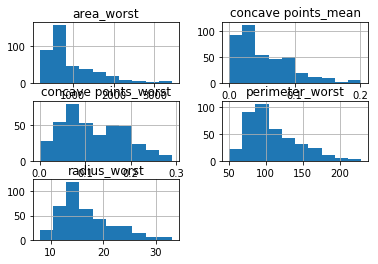

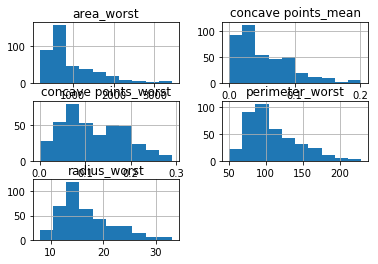

In [46]:
import pandas as pd
import numpy
import pandas_montecarlo
from scipy.stats import shapiro, kruskal, f_oneway
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression as lgr
from matplotlib import pyplot as plt

## RandomForest Classifier with monte carlo simulated training set
numpy.random.seed(1234)

#df = pd.read_csv("mc_test_data.csv")
#df = pd.read_csv("rndf_filt_data.csv")
df = pd.read_csv("data.csv")
#random forest selected the following columns as most predictive
df = df[['diagnosis','area_worst','concave points_mean','concave points_worst','perimeter_worst','radius_worst']]

#print(df.head())
#df = df.drop(["id","Unnamed: 32"],axis=1)
#df = df.drop(["Unnamed: 0"],axis=1)
df = df.replace({'diagnosis': "M"}, 1)
df = df.replace({'diagnosis': "B"}, 0)

#split dataset for mc seed and testing

df_mc, df = numpy.split(df, [int(.7*len(df))])

#split dataset by class
#df_1 = pd.read_csv("mc_data_M.csv").drop(["Unnamed: 0"],axis=1)
#df_0 = pd.read_csv("mc_data_B.csv").drop(["Unnamed: 0"],axis=1)
df_1 = df_mc.loc[df_mc.diagnosis==1]
df_0 = df_mc.loc[df_mc.diagnosis==0]
df_1 = df_1.drop(["diagnosis"],axis=1)
df_0 = df_0.drop(["diagnosis"],axis=1)

#simulate class 0 data
mc_sim_df_0 = pd.DataFrame()
mc_sim_df_0['diagnosis']= ['0'] * len(df_0.index)
for col in df_0.columns:
    col_sim = df_0[col].montecarlo(sims = 2, bust = 0, goal = 0).data
    col_sim = col_sim.drop(["original"],axis = 1)
    for col2 in col_sim.columns:
        mc_sim_df_0[col]=col_sim[col2]
        #if(shapiro(mc_sim_df_1[col])[1]>0.05):
            #print(kruskal(mc_sim_df_1[col],df_1[col]))
        #else:
            #print(f_oneway(mc_sim_df_1[col],df_1[col]))

#simulate class 1 data
mc_sim_df_1 = pd.DataFrame()
mc_sim_df_1['diagnosis']= ['1'] * len(df_1.index)
for col in df_1.columns:
    col_sim = df_1[col].montecarlo(sims = 2, bust = 0, goal = 0).data
    col_sim = col_sim.drop(["original"],axis = 1)
    for col2 in col_sim.columns:
        mc_sim_df_1[col]=col_sim[col2]
        #if(shapiro(mc_sim_df_1[col])[1]>0.05):
            #print(kruskal(mc_sim_df_1[col],df_1[col]))
        #else:
            #print(f_oneway(mc_sim_df_1[col],df_1[col]))


#diag = mc_sim_df_1.append(mc_sim_df_0)['diagnosis']
mc_sim_df = mc_sim_df_1.append(mc_sim_df_0)
#shuffling dataframe for good luck
#mc_sim_df = mc_sim_df.sample(frac=1)
#mc_sim_df['diagnosis']=diag
mc_sim_df.head(20)


#values formatted
labels = df["diagnosis"]
df = df.drop("diagnosis",axis=1)
dfDev, dfTes = numpy.split(df, [int(.7*len(df))])
DDev, DTes = numpy.split(labels, [int(.7*len(labels))])

DTrn =  mc_sim_df['diagnosis']
dfTrn = mc_sim_df.drop(['diagnosis'], axis = 1)

mc_sim_df.to_csv('mc_sim.csv')
df_mc.to_csv('original.csv')
mc_sim_df.hist()
plt.show()
df_mc = df_mc.drop(['diagnosis'], axis = 1)
df_mc.hist()
plt.show()

mc area_worst


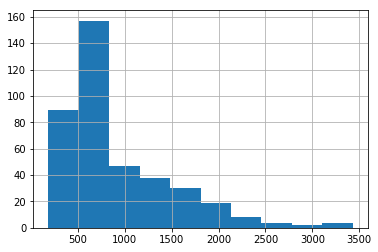

mc concave points_mean


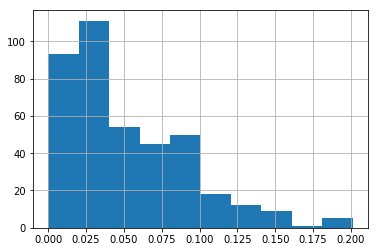

mc concave points_worst


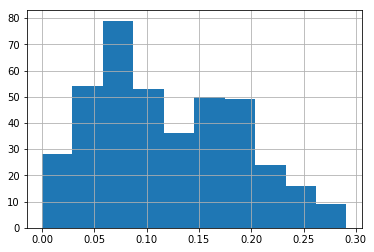

mc perimeter_worst


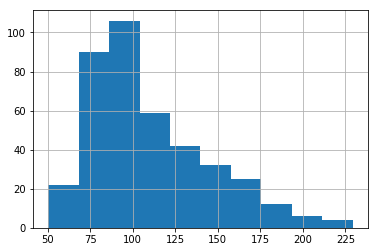

mc radius_worst


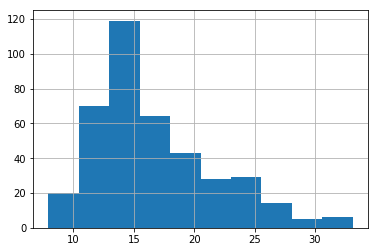

og area_worst


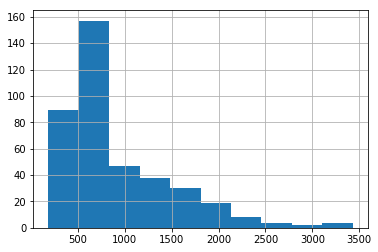

og concave points_mean


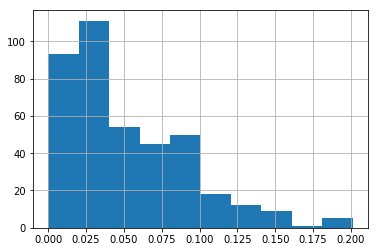

og concave points_worst


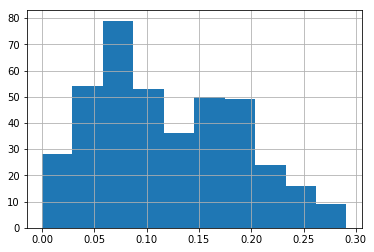

og perimeter_worst


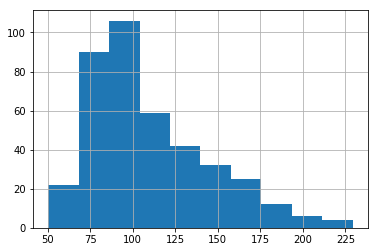

og radius_worst


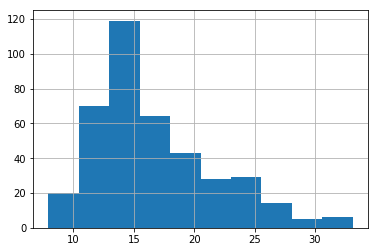

In [53]:
mc_sim_df = mc_sim_df.drop(['diagnosis'], axis = 1)
for col in mc_sim_df.columns:
    print('mc '+col)
    mc_sim_df[col].hist()
    plt.show()
for col in df_mc.columns:
    print('og '+col)
    df_mc[col].hist()
    plt.show()